## An Analysis of the College Scorecard Data for the Academic Year 2017-2018

I will be analysing data from the year 2017-2018 and will be looking at the following question;


1. How are the instituitions spread across the US? i.e which state has the most instituiitons. 

2. Which states have the most instituitions?

3. How is the governance structure distributed ?

4.  What is the distribution of the highest awards granted by the institutions?

5.  What is the distribution of the prediminant awards granted by the institutions?

6. How much net revenue on average do public and private schools generate per student?

7. How is an instution's Net Tuition Fee per Full Time Student correlated to its admission rate?

8. Finally we will use ML to see if a student's application will be accepted or not.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import confusion_matrix
from scipy import stats
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Storing the dataset into a pandas dataframe


In [2]:
df_cs=pd.read_csv('MERGED2017_18_PP.csv',low_memory=False)

In [3]:
df_cs.info()
df_cs.describe()
df_cs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Columns: 1977 entries, UNITID to OMENRUP_PARTTIME_POOLED_SUPP
dtypes: float64(1862), int64(14), object(101)
memory usage: 107.3+ MB


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,https://galileo.aamu.edu/NetPriceCalculator/np...,...,0.4048,0.2645,0.0137,0.315,0.3755,0.2958,0.0289,0.4224,0.2635,0.2852
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.5448,0.12,0.0728,0.2583,0.5872,0.0817,0.1398,0.2618,0.3977,0.2008
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.4647,0.1912,0.0148,0.3284,0.4391,0.2177,0.028,0.3645,0.4486,0.1589
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.5121,0.1593,0.0165,0.323,0.5361,0.1243,0.0245,0.3947,0.3476,0.2331
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.4226,0.0754,0.0254,0.5327,0.3133,0.1286,0.021,0.5804,0.1678,0.2308


The dataset has 1977 columns with most of them NULL. Inorder to make this more tidy and make my analyses convinient, I will only look into particular columns. After going through the documentation of this dataset, I selected a few particular variables that would be of use to my analyses.  

The Columns that are of use to my analyses are:
>UNITID - Unique ID of the institutes

>INSTNM - Institue Name

>CITY, STABBR

>NUMBRANCH - Number of branch campuses of that institution.

>HIGHDEG - Highest award level granted by the institution.

>PREDDEG - Which award is predominently granted by the institution.

>CONTROL - Is the institution public, private nonprofit, or private for-profit.

>DISTANCEONLY - Is it an online only institution?

>TUITFTE - The net tuition revenue per full-time equivalent (FTE) student.

>AVGFACSAL -The average faculty salary.

>ADM_RATE_ALL -  Admission Rate

>UGDS - Number of degree/certificate-seeking undergraduates enrolled in fall.

> SATVR25, SATVR75, SATMT25, SATMT75, ACTCM25, ACTCM75 - This is the data for 25h and 75th percentile for the SAT reading and Maths and the ACT.

>PCTFLOAN - The share of undergraduate students who received federal loans in a given year.


I will now be cleaning the data.


In [4]:
cols = ['UNITID', 'INSTNM', 'CITY', 'STABBR', 'NUMBRANCH', 'HIGHDEG', 'PREDDEG', 'CONTROL', 'DISTANCEONLY', 
                    'TUITFTE', 'AVGFACSAL', 'ADM_RATE_ALL', 'UGDS', 'PCTFLOAN', 'SATVR25', 'SATVR75','SATMT25','SATMT75','ACTCM25','ACTCM75' ]

df_cs_clean = df_cs[cols]

df_cs_clean.shape

(7112, 20)

The dataset has 7112 rows and 20 variables that we chose. We will further examine the type of these variables.

In [5]:
df_cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 20 columns):
UNITID          7112 non-null int64
INSTNM          7112 non-null object
CITY            7112 non-null object
STABBR          7112 non-null object
NUMBRANCH       7112 non-null int64
HIGHDEG         7112 non-null int64
PREDDEG         7112 non-null int64
CONTROL         7112 non-null int64
DISTANCEONLY    6668 non-null float64
TUITFTE         6644 non-null float64
AVGFACSAL       4245 non-null float64
ADM_RATE_ALL    2250 non-null float64
UGDS            6364 non-null float64
PCTFLOAN        6342 non-null float64
SATVR25         1238 non-null float64
SATVR75         1238 non-null float64
SATMT25         1238 non-null float64
SATMT75         1238 non-null float64
ACTCM25         1292 non-null float64
ACTCM75         1292 non-null float64
dtypes: float64(12), int64(5), object(3)
memory usage: 1.1+ MB


Some of the variables are stored as the wrong type.HIGHDEG, PREDEG and CONTROL are all categorical variables but are stored as int64. Converting them back to categorical values will make our analysis easier.


For both HIGHDEG and PREDEG, the documentation maps their categorical values to numeric values as follows: 

>0 - N/A

>1 - CERTIFICATE

>2 - ASSOCIATE'S DEGREE

>3 - BACHELOR'S DEGREE

>4 - GRADUATE'S DEGREE

In [6]:
df_cs_clean['PREDDEG'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's", 
                                                       4:"Graduate's"}, 
                                         inplace = True)

df_cs_clean['HIGHDEG'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's", 
                                                       4:"Graduate's"}, 
                                         inplace = True)


df_cs_clean['PREDDEG'] = pd.Categorical(df_cs_clean.PREDDEG, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)


df_cs_clean['HIGHDEG'] = pd.Categorical(df_cs_clean.HIGHDEG, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)

In [7]:
df_cs_clean['PREDDEG'].head()


0    Bachelor's
1    Bachelor's
2    Bachelor's
3    Bachelor's
4    Bachelor's
Name: PREDDEG, dtype: category
Categories (4, object): [Certificate < Associate's < Bachelor's < Graduate's]

In [8]:
df_cs_clean['HIGHDEG'].head()

0    Graduate's
1    Graduate's
2    Graduate's
3    Graduate's
4    Graduate's
Name: HIGHDEG, dtype: category
Categories (4, object): [Certificate < Associate's < Bachelor's < Graduate's]

Now looking at the documentation, DISTANCEONLY has 2 categories, Yes (given by 1.0) and No (given by 1.0). However, it's stored as float64. We will be fixing that now.

In [9]:
df_cs_clean.DISTANCEONLY.replace(to_replace = {0.0: 'No', 1.0: 'Yes'}, inplace = True)

df_cs_clean['DISTANCEONLY'] = pd.Categorical(df_cs_clean.DISTANCEONLY, categories = ['No', 'Yes'], ordered = False)

In [10]:
df_cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 20 columns):
UNITID          7112 non-null int64
INSTNM          7112 non-null object
CITY            7112 non-null object
STABBR          7112 non-null object
NUMBRANCH       7112 non-null int64
HIGHDEG         6637 non-null category
PREDDEG         6664 non-null category
CONTROL         7112 non-null int64
DISTANCEONLY    6668 non-null category
TUITFTE         6644 non-null float64
AVGFACSAL       4245 non-null float64
ADM_RATE_ALL    2250 non-null float64
UGDS            6364 non-null float64
PCTFLOAN        6342 non-null float64
SATVR25         1238 non-null float64
SATVR75         1238 non-null float64
SATMT25         1238 non-null float64
SATMT75         1238 non-null float64
ACTCM25         1292 non-null float64
ACTCM75         1292 non-null float64
dtypes: category(3), float64(11), int64(3), object(3)
memory usage: 966.0+ KB


Control is also a categorical variable as it has 3 categories; 
>1 - Public

>2 - Private Nonprofit

>3 - Private For-Profit

In [11]:
df_cs_clean.CONTROL.replace(to_replace = {1: 'Public', 2: 'Private Nonprofit', 3: 'Private For-Profit'}, inplace = True)

df_cs_clean['CONTROL'] = pd.Categorical(df_cs_clean.CONTROL, categories = ['Public', 'Private Nonprofit', 'Private For-Profit'],
                                    ordered = False)


In [12]:
df_cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 20 columns):
UNITID          7112 non-null int64
INSTNM          7112 non-null object
CITY            7112 non-null object
STABBR          7112 non-null object
NUMBRANCH       7112 non-null int64
HIGHDEG         6637 non-null category
PREDDEG         6664 non-null category
CONTROL         7112 non-null category
DISTANCEONLY    6668 non-null category
TUITFTE         6644 non-null float64
AVGFACSAL       4245 non-null float64
ADM_RATE_ALL    2250 non-null float64
UGDS            6364 non-null float64
PCTFLOAN        6342 non-null float64
SATVR25         1238 non-null float64
SATVR75         1238 non-null float64
SATMT25         1238 non-null float64
SATMT75         1238 non-null float64
ACTCM25         1292 non-null float64
ACTCM75         1292 non-null float64
dtypes: category(4), float64(11), int64(2), object(3)
memory usage: 917.5+ KB


I will now convert all the float64 values to int64 inorder to perform supervised learning later on. I would also have to replace the NaN values to 0 inorder to make this conversion.

Now we will look at the cleaned dataset and store it in a different variable for further analyses.

In [13]:
df_cs_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 20 columns):
UNITID          7112 non-null int64
INSTNM          7112 non-null object
CITY            7112 non-null object
STABBR          7112 non-null object
NUMBRANCH       7112 non-null int64
HIGHDEG         6637 non-null category
PREDDEG         6664 non-null category
CONTROL         7112 non-null category
DISTANCEONLY    6668 non-null category
TUITFTE         6644 non-null float64
AVGFACSAL       4245 non-null float64
ADM_RATE_ALL    2250 non-null float64
UGDS            6364 non-null float64
PCTFLOAN        6342 non-null float64
SATVR25         1238 non-null float64
SATVR75         1238 non-null float64
SATMT25         1238 non-null float64
SATMT75         1238 non-null float64
ACTCM25         1292 non-null float64
ACTCM75         1292 non-null float64
dtypes: category(4), float64(11), int64(2), object(3)
memory usage: 917.5+ KB


In [14]:
df_copy = df_cs_clean.copy()

Now I will analyse the dataset and answer the questions that I presentated above.


#### _Which states have the highest number of instituitions?_


To answer this, we will plot a simple bargraph of the states (STABBR) and its value counts.

Text(0.5,0,'State')

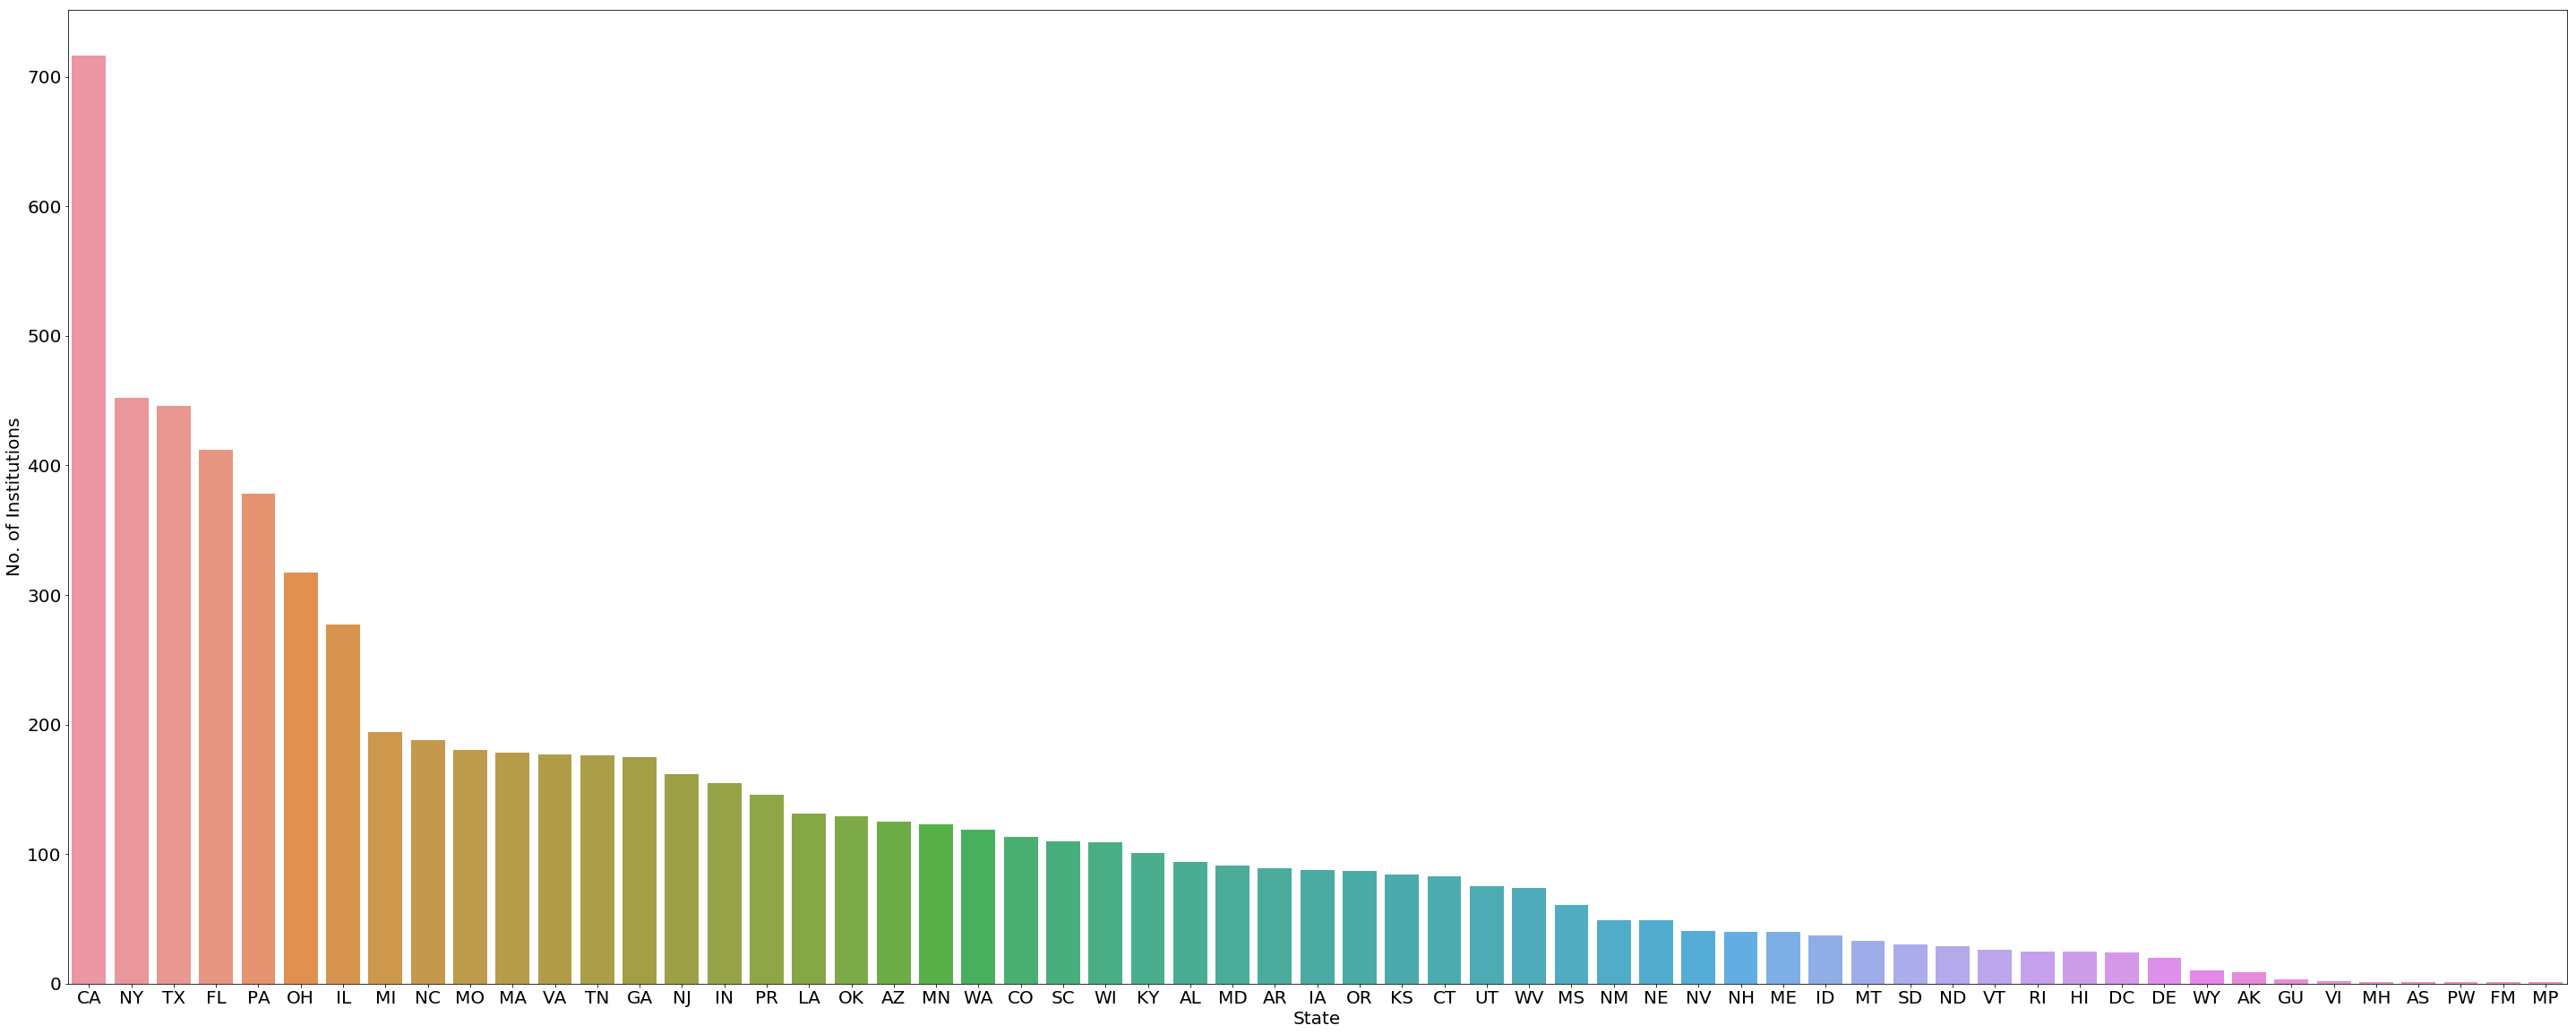

In [15]:
plt.figure(figsize = (50,20))

x=  df_copy.STABBR.value_counts().index
y = df_copy.STABBR.value_counts().values

# Plot the states vs their value counts
plot = sns.barplot(x, y)

plot.tick_params(axis='both', which='major', labelsize=20)
plot.tick_params(axis='both', which='minor', labelsize=15)
plt.ylabel('No. of Institutions', fontsize = 20)
plt.xlabel('State', fontsize = 20)



>A seen in the graph, California has the most number of institutions while New York, Texas, Florida and Pennyslvania come close. 
As for the lowest, MH, PW, FM ,MP and AS each have 1 institute. These are actually commonwealth territories which arent exactly states.

Now we will be answering the second question;

#### _How is the governance structure distributed ?_

Public =  29.190101237345335
Private NonProfit =  28.69797525309336
Private For-Profit =  42.11192350956131


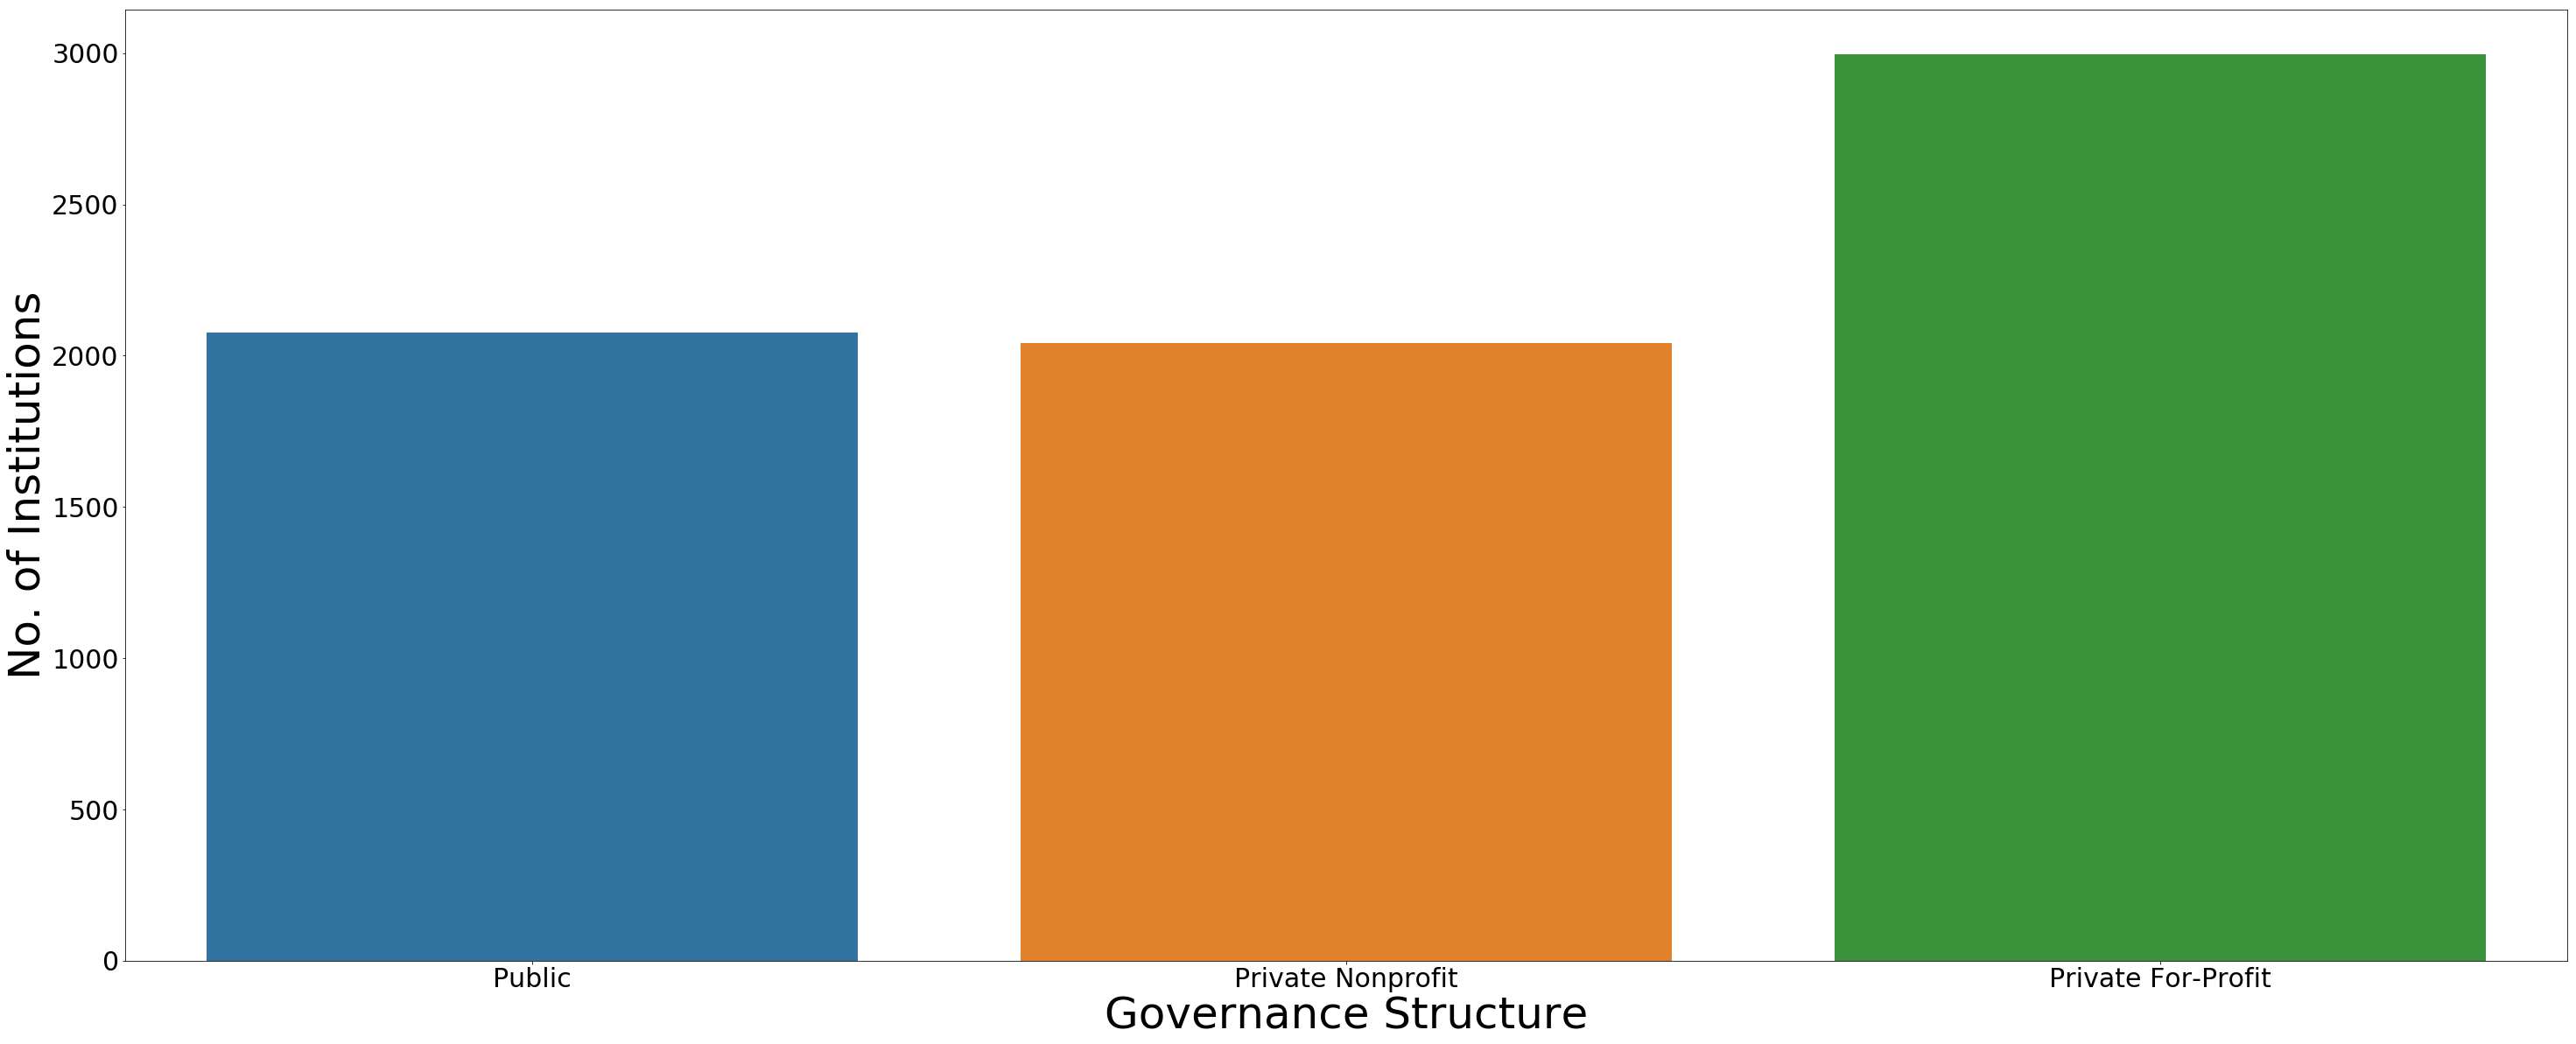

In [16]:
plt.figure(figsize = (50,20))

x=  df_copy.CONTROL.value_counts().index
y = df_copy.CONTROL.value_counts().values

# Plot the Structure vs their value counts
plot = sns.barplot(x, y)

plot.tick_params(axis='both', which='major', labelsize=30)
plot.tick_params(axis='both', which='minor', labelsize=35)
plt.ylabel('No. of Institutions', fontsize = 50)
plt.xlabel('Governance Structure', fontsize = 50)

percentage = (df_copy.CONTROL.value_counts()/df_copy.shape[0])*100

print('Public = ', percentage[0])
print('Private NonProfit = ', percentage[1])
print('Private For-Profit = ', percentage[2])

>As seen in the analyses above, the number of Public and Private Nonprofit institutions is approximately the same. The number of Private For-Profit institutions is the highest with around 42% of all institutions in the US belonging to this structure.

#### _What is the distribution of the awards predominantly granted by the institutions?_


Text(0.5,0,'Predominant Award')

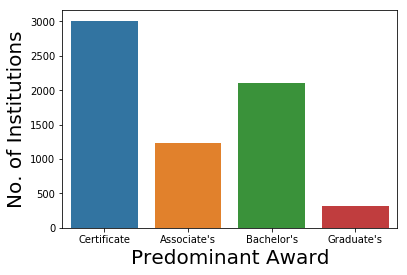

In [17]:
x = df_copy.PREDDEG.value_counts(sort = False).index
y = df_copy.PREDDEG.value_counts(sort = False).values

plot = sns.barplot(x, y)

plot.tick_params(axis='both', which='major', labelsize=10)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('No. of Institutions', fontsize = 20)
plt.xlabel('Predominant Award', fontsize = 20)


>As seen in the graph above, Certificate is the most predominant award granted by the highest number of institutions while Graduate's degree is the least predominant.
>Bachelor's degree comes a close second as being the most predominant degree awarded.

#### _What is the distribution of the highest award granted by the institutions?_


Text(0.5,0,' Highest Award')

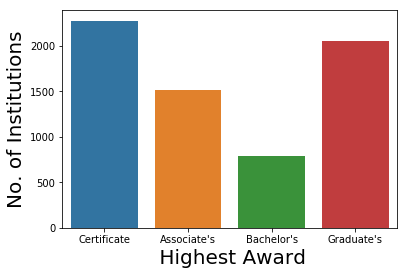

In [18]:
x = df_copy.HIGHDEG.value_counts(sort = False).index
y = df_copy.HIGHDEG.value_counts(sort = False).values

plot = sns.barplot(x, y)

plot.tick_params(axis='both', which='major', labelsize=10)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('No. of Institutions', fontsize = 20)
plt.xlabel(' Highest Award', fontsize = 20)


>Certificate and Graduate's degree are the highest awards most universities. As for the bachelor's degree, relatively few universities offer it as their highest degree. 


To study this further, we will look at the bivariate table for this.

In [19]:
df_copy.groupby(['HIGHDEG', 'PREDDEG']).size().reset_index(name = 'Number of Institutions')

,HIGHDEG,PREDDEG,Number of Institutions
0,Certificate,Certificate,2279
1,Associate's,Certificate,631
2,Associate's,Associate's,887
3,Bachelor's,Certificate,56
4,Bachelor's,Associate's,290
5,Bachelor's,Bachelor's,442
6,Graduate's,Certificate,36
7,Graduate's,Associate's,53
8,Graduate's,Bachelor's,1657
9,Graduate's,Graduate's,306


We can better represent this using a scatterplot.

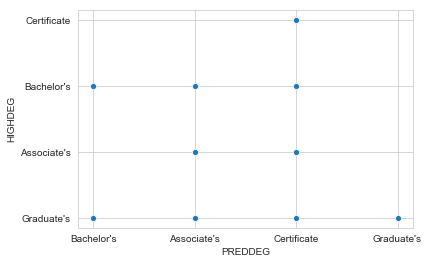

In [20]:

sns.set_style("whitegrid")
sns.scatterplot(x = df_copy['PREDDEG'], y = df_copy['HIGHDEG'])


>Looking at both the table and the scatterplot, we can see that Certificates are offered by the 2259 institutes as both their highest degree and predominant degree.

>306 institutions are predominantly for Bachelor's but offer Graduate's as their highest degree.

>Predominantly Graduate's institutions also have the same degree as their highest award, this shows that they are exclusively for Graduate degrees only.

####  _Which governance structure earns more net tuition per student?_

In [21]:
df_copy.TUITFTE.describe()

count      6644.000000
mean      10767.397351
std       12535.327041
min           0.000000
25%        4918.000000
50%        9155.500000
75%       13906.250000
max      712078.000000
Name: TUITFTE, dtype: float64

We can see that the average net Tuition per Full Time Student is is 10769 US Dollars. We need to see which institutions earn more and less than the average inorder to better look at this correlation.

In [22]:
greater_avg = df_copy.query('TUITFTE > 10767.397351').groupby('CONTROL').size().reset_index(name = 'More than avg')

lesser_avg = df_copy.query('TUITFTE < 10767.397351').groupby('CONTROL').size().reset_index(name = 'Less than avg')


df_merged=greater_avg.merge(lesser_avg)

print(df_merged)


              CONTROL  More than avg  Less than avg
0              Public            164           1819
1   Private Nonprofit           1272            623
2  Private For-Profit           1219           1547


>From the above table, it can be seen that only a handful of public institutions earn more than the average of 10769 Dollars. Most of them earn less. 

>While the number of private schools that earn more than the average is quite high. Of all the institutions that earn more than 10769 Dollars per FTE, 93.8% belong to the private structure.

#### Correlation: _How is an instution's Net Tuition Fee per Full Time Student correlated to its admission rate?_

We will first visualise this relationship using a regression plot and then we will calculate the Pearson's Correlation Coefficient for it.

               TUITFTE  ADM_RATE_ALL
TUITFTE       1.000000     -0.128895
ADM_RATE_ALL -0.128895      1.000000


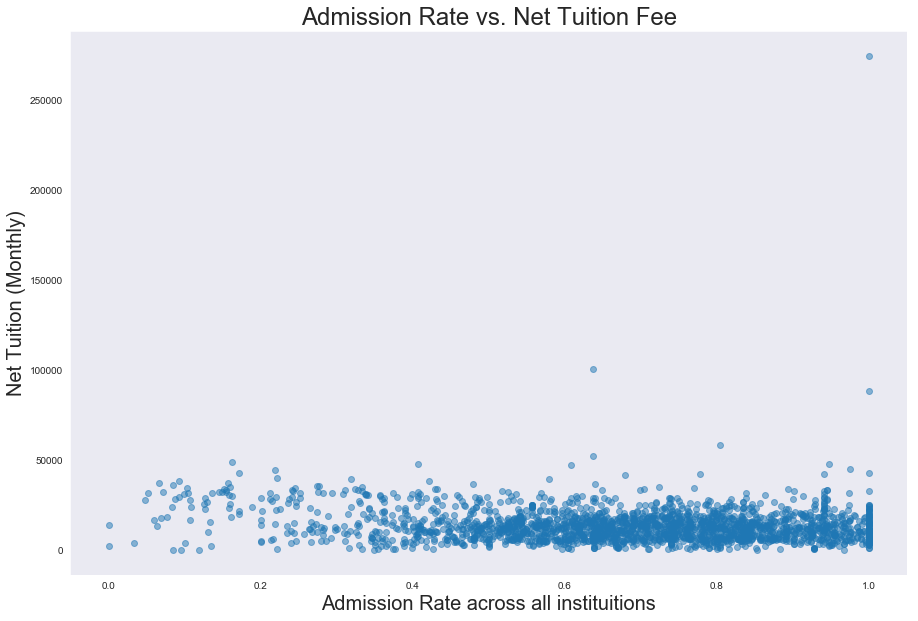

In [23]:
sns.set_style('dark')


plt.figure(figsize = (15, 10))
sns.regplot(data = df_copy, x = 'ADM_RATE_ALL', y = 'TUITFTE', fit_reg = False, scatter_kws = {'alpha':1/2})

plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)
plt.title('Admission Rate vs. Net Tuition Fee', fontsize = 24)
plt.xlabel('Admission Rate across all instituitions', fontsize = 20)
plt.ylabel('Net Tuition (Monthly)', fontsize = 20);

print(df_copy[['TUITFTE', 'ADM_RATE_ALL']].corr())

>The admission fee of the institute is negatively correlated to the net tuition fee per full time student. However, this correlation is weaker than I had expected as there is a common misconception that Highly Selective Institutions are also the most expensive ones. 

In [24]:
df_copy.head()

,UNITID,INSTNM,CITY,STABBR,NUMBRANCH,HIGHDEG,PREDDEG,CONTROL,DISTANCEONLY,TUITFTE,AVGFACSAL,ADM_RATE_ALL,UGDS,PCTFLOAN,SATVR25,SATVR75,SATMT25,SATMT75,ACTCM25,ACTCM75
0,100654,Alabama A & M University,Normal,AL,1,Graduate's,Bachelor's,Public,No,9227.0,6983.0,0.902671,4824.0,0.7697,365.0,485.0,360.0,495.0,16.0,19.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,Graduate's,Bachelor's,Public,No,11612.0,10640.0,0.918068,12866.0,0.5207,440.0,630.0,550.0,740.0,21.0,28.0
2,100690,Amridge University,Montgomery,AL,1,Graduate's,Bachelor's,Private Nonprofit,Yes,14738.0,3866.0,NaN,322.0,0.8741,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,Graduate's,Bachelor's,Public,No,8727.0,9391.0,0.812304,6917.0,0.4278,550.0,660.0,530.0,670.0,25.0,31.0
4,100724,Alabama State University,Montgomery,AL,1,Graduate's,Bachelor's,Public,No,9003.0,7399.0,0.978661,4189.0,0.7690,380.0,485.0,375.0,481.0,16.0,20.0


#### _Predicting if a student's application will be accepted or not._

I will first convert all the float64 variables to int64 and replace the NaN with 0s for preprocessing

In [25]:

df_copy['TUITFTE'] = df_copy['TUITFTE'].fillna(0).astype(np.int64)
df_copy['TUITFTE'] = df_copy['TUITFTE'].astype(np.int64)

df_copy['AVGFACSAL'] = df_copy['AVGFACSAL'].fillna(0).astype(np.int64)
df_copy['AVGFACSAL'] = df_copy['AVGFACSAL'].astype(np.int64)

df_copy['ADM_RATE_ALL'] = df_copy['ADM_RATE_ALL'].fillna(0).astype(np.int64)
df_copy['ADM_RATE_ALL'] = df_copy['ADM_RATE_ALL'].astype(np.int64)

df_copy['UGDS'] = df_copy['UGDS'].fillna(0).astype(np.int64)
df_copy['UGDS'] = df_copy['UGDS'].astype(np.int64)

df_copy['PCTFLOAN'] = df_copy['PCTFLOAN'].fillna(0).astype(np.int64)
df_copy['PCTFLOAN'] = df_copy['PCTFLOAN'].astype(np.int64)

df_copy['SATVR25'] = df_copy['SATVR25'].fillna(0).astype(np.int64)
df_copy['SATVR25'] = df_copy['SATVR25'].astype(np.int64)

df_copy['SATVR75'] = df_copy['SATVR75'].fillna(0).astype(np.int64)
df_copy['SATVR75'] = df_copy['SATVR75'].astype(np.int64)

df_copy['SATMT25'] = df_copy['SATMT25'].fillna(0).astype(np.int64)
df_copy['SATMT25'] = df_copy['SATMT25'].astype(np.int64)

df_copy['SATMT75'] = df_copy['SATMT75'].fillna(0).astype(np.int64)
df_copy['SATMT75'] = df_copy['SATMT75'].astype(np.int64)

df_copy['ACTCM25'] = df_copy['ACTCM25'].fillna(0).astype(np.int64)
df_copy['ACTCM25'] = df_copy['ACTCM25'].astype(np.int64)

df_copy['ACTCM75'] = df_copy['ACTCM75'].fillna(0).astype(np.int64)
df_copy['ACTCM75'] = df_copy['ACTCM75'].astype(np.int64)



We need to choose the feature values we need and scale them to a uniform range.

In [26]:

df_pred = df_copy[['UNITID', 'NUMBRANCH', 
                    'TUITFTE', 'AVGFACSAL', 'ADM_RATE_ALL', 'UGDS', 'PCTFLOAN', 'SATVR25', 'SATVR75','SATMT25','SATMT75','ACTCM25','ACTCM75' ]]

df_pred = df_pred.values

# Segregate features and labels 
X,y = df_pred[:,0:12] , df_pred[:,12]

#using MinMaxScaler to rescale
scaler = MinMaxScaler(copy=True,feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

We will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 42)


We will use the Logistic Regression for the prediction

In [28]:

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = logreg.predict(X_test)

print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

confusion_matrix(y_pred, y_test)

Accuracy of logistic regression classifier:  0.8351086493395824


array([[1921,    1,    2,    3,    1,    0,    0,    1,    5,    8,    7,
           2,    0,    1,    1,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],

The Logistic Regression Model gave us an accuracy of 83%. We will try using the Decision Tree Model how to see if we can get a higher accuracy.

In [30]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

In [31]:
y_pred = clf.predict(X_test)

print("Accuracy of decision tree classifier: ", clf.score(X_test, y_test))


confusion_matrix(y_pred, y_test)


Accuracy of decision tree classifier:  0.8828291435875586


array([[1921,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    1,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    1,    1,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    3,    0,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,   

The decision tree model gave us an accuracy of 88%. This means our model successfully predicted the result of an Applicant by 88%s